<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch04_gradient_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

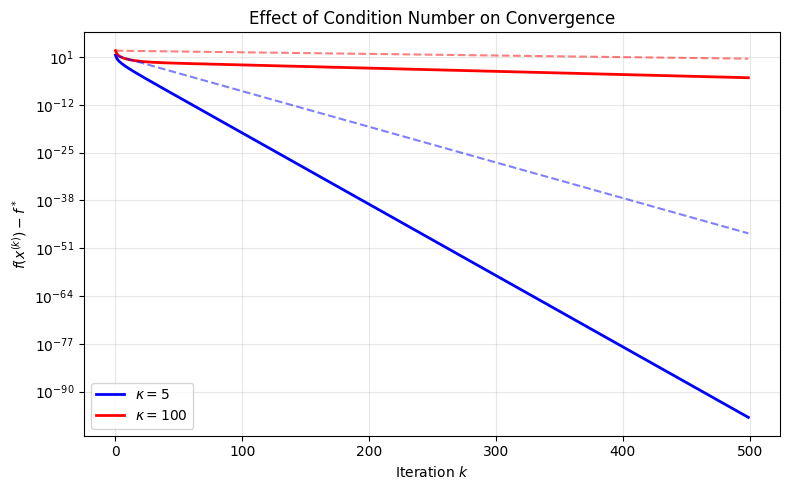

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def run_gd(Q, n_iters=500):
    n = Q.shape[0]        # Get dimension from Q
    x = np.ones(n)        # Initialize x with correct dimension
    M = np.max(np.diag(Q))
    eta = 1.0 / M

    errors = []
    for _ in range(n_iters):
        f_val = 0.5 * x @ Q @ x
        errors.append(f_val)  # f* = 0
        x = x - eta * (Q @ x)
    return errors

def compare_convergence():
    """Compare GD convergence under different function properties."""
    np.random.seed(42)
    n = 20

    # Well-conditioned quadratic (kappa = 5)
    Q_good = np.diag(np.linspace(1, 5, n))

    # Ill-conditioned quadratic (kappa = 100)
    Q_bad = np.diag(np.linspace(1, 100, n))

    errors_good = run_gd(Q_good)
    errors_bad = run_gd(Q_bad)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.semilogy(errors_good, 'b-', linewidth=2, label=r'$\kappa = 5$')
    ax.semilogy(errors_bad, 'r-', linewidth=2, label=r'$\kappa = 100$')

    # Theoretical rates
    k = np.arange(1, 501)
    ax.semilogy(errors_good[0] * (1 - 1/5)**k, 'b--', alpha=0.5)
    ax.semilogy(errors_bad[0] * (1 - 1/100)**k, 'r--', alpha=0.5)

    ax.set_xlabel('Iteration $k$')
    ax.set_ylabel('$f(x^{(k)}) - f^*$')
    ax.set_title('Effect of Condition Number on Convergence')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('condition_number.pdf', bbox_inches='tight')
    plt.show()

compare_convergence()